In [2]:
# -*- coding: utf-8 -*-
"""Convert the Yelp Dataset Challenge dataset from json format to csv.

For more information on the Yelp Dataset Challenge please visit http://yelp.com/dataset_challenge

"""
import argparse
import collections
import csv
import simplejson as json


def read_and_write_file(json_file_path, csv_file_path, column_names):
    """Read in the json dataset file and write it out to a csv file, given the column names."""
    with open(csv_file_path, 'wb+') as fout:
        csv_file = csv.writer(fout)
        csv_file.writerow(list(column_names))
        with open(json_file_path) as fin:
            for line in fin:
                line_contents = json.loads(line)
                csv_file.writerow(get_row(line_contents, column_names))

def read_and_write_file_by_category(json_file_path, csv_file_path, column_names, category_name):
    """Read in the json dataset file and write it out to a csv file, given the column names."""
    with open(csv_file_path, 'wb+') as fout:
        csv_file = csv.writer(fout)
        csv_file.writerow(list(column_names))
        if "categories" not in list(column_names):
            # print "No column named category"
            return
        with open(json_file_path) as fin:
            for line in fin:
                line_contents = json.loads(line)
                if category_name in line_contents["categories"]:
                    csv_file.writerow(get_row(line_contents, column_names))

def get_superset_of_column_names_from_file(json_file_path):
    """Read in the json dataset file and return the superset of column names."""
    column_names = set()
    with open(json_file_path) as fin:
        for line in fin:
            line_contents = json.loads(line)
            column_names.update(
                    set(get_column_names(line_contents).keys())
                    )
    return column_names

def get_column_names(line_contents, parent_key=''):
    """Return a list of flattened key names given a dict.

    Example:

        line_contents = {
            'a': {
                'b': 2,
                'c': 3,
                },
        }

        will return: ['a.b', 'a.c']

    These will be the column names for the eventual csv file.

    """
    column_names = []
    for k, v in line_contents.iteritems():
        column_name = "{0}.{1}".format(parent_key, k) if parent_key else k
        if isinstance(v, collections.MutableMapping):
            column_names.extend(
                    get_column_names(v, column_name).items()
                    )
        else:
            column_names.append((column_name, v))
    return dict(column_names)

def get_nested_value(d, key):
    """Return a dictionary item given a dictionary `d` and a flattened key from `get_column_names`.
    
    Example:

        d = {
            'a': {
                'b': 2,
                'c': 3,
                },
        }
        key = 'a.b'

        will return: 2
    
    """
    if '.' not in key:
        if key not in d:
            return None
        return d[key]
    base_key, sub_key = key.split('.', 1)
    if base_key not in d:
        return None
    sub_dict = d[base_key]
    return get_nested_value(sub_dict, sub_key)

def get_row(line_contents, column_names):
    """Return a csv compatible row given column names and a dict."""
    row = []
    for column_name in column_names:
        line_value = get_nested_value(
                        line_contents,
                        column_name,
                        )
        if isinstance(line_value, unicode):
            row.append('{0}'.format(line_value.encode('utf-8')))
        elif line_value is not None:
            row.append('{0}'.format(line_value))
        else:
            row.append('')
    return row

if __name__ == '__main__':
    """Convert a yelp dataset file from json to csv."""

    parser = argparse.ArgumentParser(
            description='Convert Yelp Dataset Challenge data from JSON format to CSV.',
            )

    parser.add_argument(
            'json_file',
            type=str,
            default='../dataset/yelp_academic_dataset_business.json',
            help='The json file to convert.',
            )
    parser.add_argument(
        'category_name',
        type = str,
        default= "Restaurants",
        help = "Category Name"
    )
#     args = parser.parse_args()

#     json_file = args.json_file
    json_file = '../dataset/yelp_academic_dataset_business.json'
#     csv_file = '{0}.csv'.format(json_file.split('.json')[0])
    csv_file = 'Restaurant.csv'
#     category_name = args.category_name
    category_name = "Restaurants"
    column_names = get_superset_of_column_names_from_file(json_file)

    read_and_write_file_by_category(json_file, csv_file, column_names, category_name)


In [4]:
""" Converting our csv data to numpy array. Makes life easier"""
import csv
import numpy as np

csv_reader = csv.reader(open('Restaurant.csv', 'rb'))
header = csv_reader.next()
data = []

for row in csv_reader:
    data.append(row)

data = np.array(data)

In [4]:
""" Using pandas to get an idea about the data"""
import pandas as pd

df = pd.read_csv('Restaurant.csv', header=0)


/home/geekineer/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1,4,7,13,17,26,29,49,60,62,77,79,86,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Checking if it worked
df.head(5)

,attributes.Ambience.divey,attributes.Dietary Restrictions.vegan,attributes.Happy Hour,hours.Thursday.open,attributes.Order at Counter,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.BYOB,hours.Friday.open,attributes.Good For.latenight,...,attributes.Noise Level,attributes.Smoking,attributes.Attire,attributes.Hair Types Specialized In.curly,attributes.Good For Groups,neighborhoods,attributes.Open 24 Hours,attributes.Ambience.romantic,attributes.Music.jukebox,attributes.Ambience.upscale
0,False,NaN,NaN,11:00,NaN,NaN,NaN,NaN,11:00,False,...,average,NaN,casual,NaN,True,[],NaN,False,NaN,False
1,False,NaN,False,10:00,NaN,NaN,NaN,NaN,10:00,False,...,average,no,casual,NaN,True,[],NaN,False,NaN,False
2,False,NaN,True,11:00,NaN,NaN,NaN,NaN,11:00,False,...,loud,outdoor,casual,NaN,True,['Greentree'],NaN,False,NaN,False
3,NaN,NaN,NaN,08:00,NaN,NaN,NaN,NaN,08:00,False,...,NaN,NaN,casual,NaN,True,[],NaN,NaN,NaN,NaN
4,False,NaN,NaN,11:00,NaN,NaN,NaN,NaN,11:00,False,...,average,no,casual,NaN,True,[],NaN,False,NaN,False


In [7]:
"""Lets look at column datatypes"""
df.dtypes

attributes.Ambience.divey                                object
attributes.Dietary Restrictions.vegan                    object
attributes.Happy Hour                                    object
hours.Thursday.open                                      object
attributes.Order at Counter                              object
attributes.Hair Types Specialized In.africanamerican    float64
attributes.Hair Types Specialized In.kids               float64
attributes.BYOB                                          object
hours.Friday.open                                        object
attributes.Good For.latenight                            object
attributes.Outdoor Seating                               object
attributes.Alcohol                                       object
attributes.Ambience.classy                               object
attributes.By Appointment Only                           object
attributes.Parking.lot                                   object
business_id                             

In [8]:
"""Lot of objects. Not Good"""

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25071 entries, 0 to 25070
Data columns (total 98 columns):
attributes.Ambience.divey                               18548 non-null object
attributes.Dietary Restrictions.vegan                   147 non-null object
attributes.Happy Hour                                   2383 non-null object
hours.Thursday.open                                     16162 non-null object
attributes.Order at Counter                             366 non-null object
attributes.Hair Types Specialized In.africanamerican    0 non-null float64
attributes.Hair Types Specialized In.kids               0 non-null float64
attributes.BYOB                                         831 non-null object
hours.Friday.open                                       16192 non-null object
attributes.Good For.latenight                           21509 non-null object
attributes.Outdoor Seating                              22253 non-null object
attributes.Alcohol                            

In [9]:
""" Checking number of rows"""

len(df.index)

25071

In [10]:
""" Calculate mean, stddev, min, max and all good stuff :)"""

df.describe()

,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.Hair Types Specialized In.straightperms,attributes.Price Range,review_count,attributes.Hair Types Specialized In.asian,attributes.Hair Types Specialized In.coloring,open,stars,latitude,longitude,attributes.Hair Types Specialized In.extensions,attributes.Hair Types Specialized In.perms,attributes.Hair Types Specialized In.curly
count,0,0,0,23404.000000,25071.000000,0,0,25071,25071.000000,25071.000000,25071.000000,0,0,0
mean,NaN,NaN,NaN,1.634934,59.552870,NaN,NaN,0.773483,3.482111,38.246153,-93.143806,NaN,NaN,NaN
std,NaN,NaN,NaN,0.650694,145.586088,NaN,NaN,0.418586,0.749531,6.046039,30.895755,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,False,1.000000,32.876619,-115.351900,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,7.000000,NaN,NaN,1,3.000000,33.565818,-112.273268,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.000000,19.000000,NaN,NaN,1,3.500000,36.071196,-111.869777,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.000000,58.000000,NaN,NaN,1,4.000000,43.014543,-80.044475,NaN,NaN,NaN
max,NaN,NaN,NaN,4.000000,5642.000000,NaN,NaN,True,5.000000,56.036545,8.549249,NaN,NaN,NaN


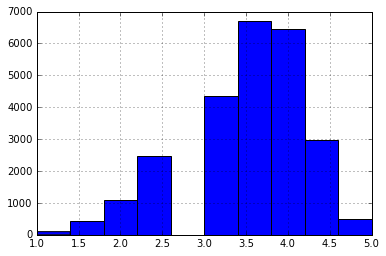

In [14]:
""" Histogram of review stars"""
%matplotlib inline
import pylab as plot

df.stars.hist()


In [12]:
""" EVery column is throwing unhashable exception. Need to fill missing values using impute/fillna :("""
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

data_columns = set(list(df)) - set(['stars'])
X = df[list(data_columns)]
Y = df["stars"]
names = list(df)
 
rf = RandomForestRegressor(n_estimators=20, max_depth=4)
scores = []
for i in range(X.shape[1]):
    try:
     score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",
                              cv=ShuffleSplit(len(X), 3, .3))
     scores.append((round(np.mean(score), 3), names[i]))
    except:
        continue
print sorted(scores, reverse=True)

[]


In [13]:
df.describe()

,attributes.Hair Types Specialized In.africanamerican,attributes.Hair Types Specialized In.kids,attributes.Hair Types Specialized In.straightperms,attributes.Price Range,review_count,attributes.Hair Types Specialized In.asian,attributes.Hair Types Specialized In.coloring,open,stars,latitude,longitude,attributes.Hair Types Specialized In.extensions,attributes.Hair Types Specialized In.perms,attributes.Hair Types Specialized In.curly
count,0,0,0,23404.000000,25071.000000,0,0,25071,25071.000000,25071.000000,25071.000000,0,0,0
mean,NaN,NaN,NaN,1.634934,59.552870,NaN,NaN,0.773483,3.482111,38.246153,-93.143806,NaN,NaN,NaN
std,NaN,NaN,NaN,0.650694,145.586088,NaN,NaN,0.418586,0.749531,6.046039,30.895755,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,False,1.000000,32.876619,-115.351900,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,7.000000,NaN,NaN,1,3.000000,33.565818,-112.273268,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.000000,19.000000,NaN,NaN,1,3.500000,36.071196,-111.869777,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.000000,58.000000,NaN,NaN,1,4.000000,43.014543,-80.044475,NaN,NaN,NaN
max,NaN,NaN,NaN,4.000000,5642.000000,NaN,NaN,True,5.000000,56.036545,8.549249,NaN,NaN,NaN


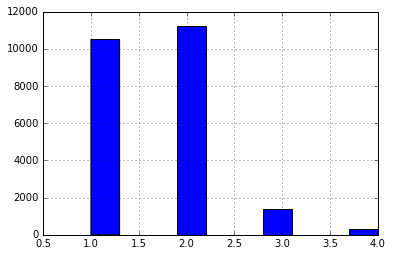

In [16]:
%matplotlib inline
df['attributes.Price Range'].hist()

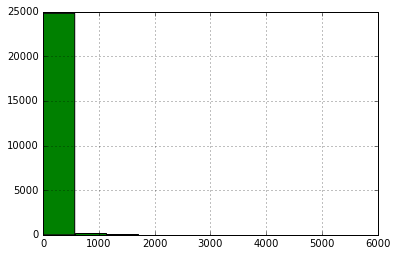

In [18]:
%matplotlib inline
df['stars'].hist()
df['review_count'].hist()